In [ ]:
#%matplotlib notebook

In [1]:
# import dependencies
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# add 2011 crime data
homicide = pd.read_csv("Data/homicide.csv", encoding="utf-8") 
homicide.head()

,CASE #,Date of Occurance,Primary Description,Description,Beat,Ward,Year,Latitude,Longitude,Month
0,HT405253,7/19/2011,HOMICIDE,FIRST DEGREE MURDER,732,6.0,2011,41.766565,-87.638386,7
1,HT578691,11/7/2011,HOMICIDE,FIRST DEGREE MURDER,2123,4.0,2011,41.822200,-87.602135,11
2,HT576092,11/5/2011,HOMICIDE,FIRST DEGREE MURDER,1122,28.0,2011,41.877169,-87.719061,11
3,HT581763,11/9/2011,HOMICIDE,FIRST DEGREE MURDER,522,34.0,2011,41.688889,-87.628242,11
4,HT582731,11/10/2011,HOMICIDE,FIRST DEGREE MURDER,614,18.0,2011,41.741304,-87.659690,11


In [3]:
year_group = homicide.groupby("Year")
year_plot = year_group['CASE #'].count().reset_index()
year_plot

,Year,CASE #
0,2001,667
1,2006,477
2,2011,438
3,2016,788
4,2020,813


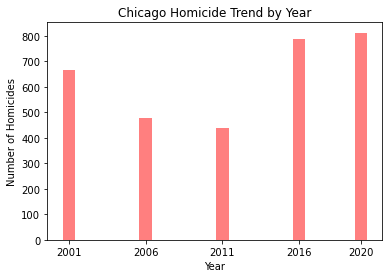

In [51]:
# set the coordiantes for the graph
y_axis = year_plot['CASE #']
x_axis = year_plot['Year']

#plot the graph
plt.bar(x_axis, y_axis, color='r', alpha=.5, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)

# Give our chart some labels and a tile
plt.title("Chicago Homicide Trend by Year")
plt.xlabel("Year")
plt.ylabel("Number of Homicides")


plt.savefig("data/year_trend.png")
plt.show()


In [35]:
# group by month
month_group = homicide.groupby("Month")
month_group = month_group['CASE #'].count().reset_index()

# calculate month percentages
seasonality = month_group['CASE #'] / month_group['CASE #'].sum()
seasonality.reset_index()
month_group['percent'] = seasonality
month_group['percent'] = month_group['percent'].map("{:,.2%}".format)
month_group

,Month,CASE #,percent
0,1,206,6.47%
1,2,151,4.74%
2,3,185,5.81%
3,4,221,6.94%
4,5,277,8.70%
5,6,333,10.46%
6,7,380,11.94%
7,8,289,9.08%
8,9,315,9.90%
9,10,306,9.61%


In [46]:
# group by ward
ward_group = homicide.groupby("Ward")
ward_group = ward_group['CASE #'].count().reset_index()

# calculate month percentages
ward_distro = ward_group['CASE #'] / ward_group['CASE #'].sum()
ward_distro.reset_index()
ward_group['percent'] = ward_distro
ward_group['percent'] = ward_group['percent'].map("{:,.2%}".format)
ward_sort = ward_group.sort_values(by=['percent'], ascending = False)

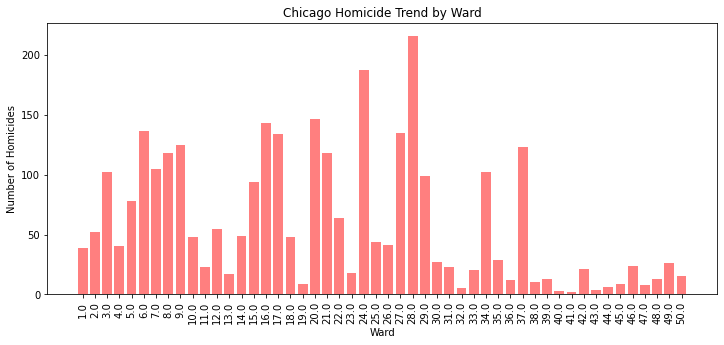

In [37]:
# set the coordiantes for the graph
y_axis = ward_sort['CASE #']
x_axis = ward_sort['Ward']

# set figure size
plt.figure(figsize=[12,5])

# string index
ward_sort.index = ward_sort.index.astype(str)

# reverse dataframe
ward_sort = ward_sort[::-1]

plt.bar(x_axis, y_axis, color='r', alpha=.5, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation=90)

# Give our chart some labels and a tile
plt.title("Chicago Homicide Trend by Ward")
plt.xlabel("Ward")
plt.ylabel("Number of Homicides")
plt.show()

In [ ]:
# plot histogram for Ward



In [ ]:
## the info below is not completely working; need to fix filter ##

In [39]:
# filter the dataframe to display only year we want to look at
data2020 = homicide.loc[homicide['Year'] == 2020]

# group by month
month20 = data2020.groupby('Month')
month20_count = month20['CASE #'].count().reset_index()

# Calculate % of total
percent_tot20 = month20_count['CASE #'] / month20_count['CASE #'].sum()
percent_tot20.reset_index()
month20_count['percent'] = percent_tot20
month20_count['year'] = 2020

In [40]:
# filter the dataframe to display only year we want to look at
data2016 = homicide.loc[homicide['Year'] == 2016]

# group by month
month16 = data2016.groupby('Month')
month16_count = month16['CASE #'].count().reset_index()

# Calculate % of total
percent_tot16 = month16_count['CASE #'] / month16_count['CASE #'].sum()
percent_tot16.reset_index()
month16_count['percent'] = percent_tot16
month16_count['year'] = 2016

In [41]:
# filter the dataframe to display only year we want to look at
data2011 = homicide.loc[homicide['Year'] == 2011]

# group by month
month11 = data2011.groupby('Month')
month11_count = month11['CASE #'].count().reset_index()

# Calculate % of total
percent_tot11 = month11_count['CASE #'] / month11_count['CASE #'].sum()
percent_tot11.reset_index()
month11_count['percent'] = percent_tot11
month11_count['year'] = 2011

In [42]:
# filter the dataframe to display only year we want to look at
data2006 = homicide.loc[homicide['Year'] == 2006]

# group by month
month06 = data2006.groupby('Month')
month06_count = month06['CASE #'].count().reset_index()

# Calculate % of total
percent_tot06 = month06_count['CASE #'] / month06_count['CASE #'].sum()
percent_tot06.reset_index()
month06_count['percent'] = percent_tot16
month06_count['year'] = 2006

In [43]:
# filter the dataframe to display only year we want to look at
data2001 = homicide.loc[homicide['Year'] == 2001]

# group by month
month01 = data2001.groupby('Month')
month01_count = month01['CASE #'].count().reset_index()

# Calculate % of total
percent_tot01 = month01_count['CASE #'] / month01_count['CASE #'].sum()
percent_tot01.reset_index()
month01_count['percent'] = percent_tot01
month01_count['year'] = 2001

In [44]:
# merge dataframes
frames = [month11_count, month16_count, month20_count, month06_count, month01_count]

count_merge = pd.concat(frames)

In [ ]:
# create trend graph

In [53]:
# Merge two dataframes using a left join
merge1 = pd.merge(month01_count, month06_count, on="Month", how="left")

# remove extra columns
merge1 = merge1.drop(columns=['year_x','CASE #_x','year_y','CASE #_y'])

# rename so data is consistent
merge1 = merge1.rename(columns={'percent_x':'2001',
                                'percent_y':'2006'}
                      )

## repeat steps to add in other years

# Merge two dataframes using a left join
merge2 = pd.merge(merge1, month11_count, on="Month", how="left")

# remove extra columns
merge2 = merge2.drop(columns=['year','CASE #'])

# rename so data is consistent
merge2 = merge2.rename(columns={'percent':'2011'})

# Merge two dataframes using a left join
merge3 = pd.merge(merge2, month16_count, on="Month", how="left")

# remove extra columns
merge3 = merge3.drop(columns=['year','CASE #'])

# rename so data is consistent
merge3 = merge3.rename(columns={'percent':'2016'})

# Merge two dataframes using a left join
percent_chart = pd.merge(merge3, month20_count, on="Month", how="left")

# remove extra columns
percent_chart = percent_chart.drop(columns=['year','CASE #'])

# rename so data is consistent
percent_chart = percent_chart.rename(columns={'percent':'2020'})

# format as percent
percent_chart['2001'] = percent_chart['2001'].map("{:,.2%}".format)
percent_chart['2006'] = percent_chart['2006'].map("{:,.2%}".format)
percent_chart['2011'] = percent_chart['2011'].map("{:,.2%}".format)
percent_chart['2016'] = percent_chart['2016'].map("{:,.2%}".format)
percent_chart['2020'] = percent_chart['2020'].map("{:,.2%}".format)

percent_chart

,Month,2001,2006,2011,2016,2020
0,1,6.30%,6.85%,6.39%,6.85%,6.52%
1,2,4.05%,5.96%,5.48%,5.96%,4.43%
2,3,5.55%,5.71%,5.25%,5.71%,5.54%
3,4,8.85%,5.08%,6.85%,5.08%,6.77%
4,5,6.30%,8.76%,8.68%,8.76%,10.58%
5,6,10.34%,10.15%,10.27%,10.15%,11.56%
6,7,11.69%,8.88%,12.56%,8.88%,13.65%
7,8,8.70%,12.18%,8.22%,12.18%,8.24%
8,9,10.64%,8.25%,9.13%,8.25%,10.09%
9,10,10.64%,10.53%,10.05%,10.53%,8.24%
